In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('alzheimers_disease_data (1).csv')
data.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


In [3]:
data.shape

(2149, 35)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

In [5]:
for col in data.columns:
  print(f"{col}: {len(data[col].unique())}")

PatientID: 2149
Age: 31
Gender: 2
Ethnicity: 4
EducationLevel: 4
BMI: 2149
Smoking: 2
AlcoholConsumption: 2149
PhysicalActivity: 2149
DietQuality: 2149
SleepQuality: 2149
FamilyHistoryAlzheimers: 2
CardiovascularDisease: 2
Diabetes: 2
Depression: 2
HeadInjury: 2
Hypertension: 2
SystolicBP: 90
DiastolicBP: 60
CholesterolTotal: 2149
CholesterolLDL: 2149
CholesterolHDL: 2149
CholesterolTriglycerides: 2149
MMSE: 2149
FunctionalAssessment: 2149
MemoryComplaints: 2
BehavioralProblems: 2
ADL: 2149
Confusion: 2
Disorientation: 2
PersonalityChanges: 2
DifficultyCompletingTasks: 2
Forgetfulness: 2
Diagnosis: 2
DoctorInCharge: 1


# **Apriori**

In [6]:

from mlxtend.frequent_patterns import apriori, association_rules

binary_columns = [
    'Smoking',
    'FamilyHistoryAlzheimers',
    'CardiovascularDisease',
    'Diabetes',
    'Depression',
    'HeadInjury',
    'Hypertension',
    'MemoryComplaints',
    'BehavioralProblems',
    'Confusion',
    'Disorientation',
    'PersonalityChanges',
    'DifficultyCompletingTasks',
    'Forgetfulness',
    'Diagnosis'
]

df_binary = data[binary_columns]

df_onehot = df_binary.applymap(lambda x: 1 if x == 1 else 0)

frequent_itemsets = apriori(df_onehot, min_support=0.05, use_colnames=True)

rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)

print("Frequent Itemsets:")
print(frequent_itemsets)


Frequent Itemsets:
     support                                  itemsets
0   0.288506                                 (Smoking)
1   0.252210                 (FamilyHistoryAlzheimers)
2   0.144253                   (CardiovascularDisease)
3   0.150768                                (Diabetes)
4   0.200558                              (Depression)
5   0.092601                              (HeadInjury)
6   0.148906                            (Hypertension)
7   0.208004                        (MemoryComplaints)
8   0.156817                      (BehavioralProblems)
9   0.205212                               (Confusion)
10  0.158213                          (Disorientation)
11  0.150768                      (PersonalityChanges)
12  0.158678               (DifficultyCompletingTasks)
13  0.301536                           (Forgetfulness)
14  0.353653                               (Diagnosis)
15  0.063751        (FamilyHistoryAlzheimers, Smoking)
16  0.050721                     (Smoking, Dep

<ipython-input-6-f039d1ae49af>:23: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_onehot = df_binary.applymap(lambda x: 1 if x == 1 else 0)
/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


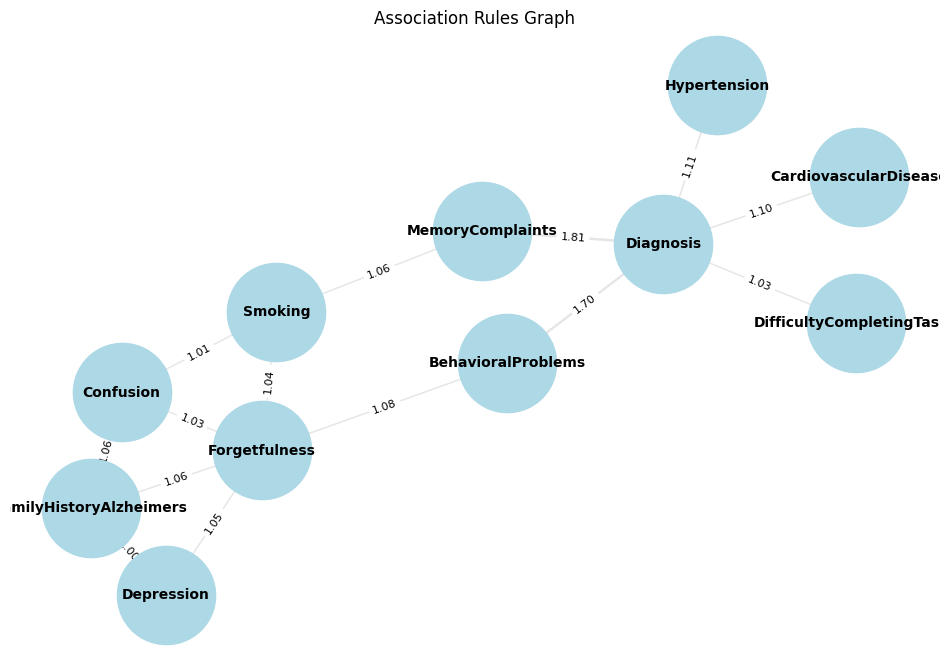

In [7]:
import networkx as nx
import matplotlib.pyplot as plt

filtered_rules = rules[(rules['lift'] > 1) & (rules['confidence'] > 0.1)]

G = nx.DiGraph()

for index, rule in filtered_rules.iterrows():
    antecedents = list(rule['antecedents'])
    consequents = list(rule['consequents'])

    for item in antecedents + consequents:
        G.add_node(item)

    for antecedent in antecedents:
        for consequent in consequents:
            G.add_edge(antecedent, consequent, weight=rule['lift'])

plt.figure(figsize=(12, 8))

pos = nx.spring_layout(G)

nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=5000)

edge_weights = [G[u][v]['weight'] for u, v in G.edges()]
nx.draw_networkx_edges(G, pos, width=edge_weights, edge_color='gray', alpha=0.1)

nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')

edge_labels = {(u, v): f"{G[u][v]['weight']:.2f}" for u, v in G.edges()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

plt.title("Association Rules Graph")
plt.axis('off')
plt.show()

# **Data Cleaning**

In [8]:
data = data.drop('DoctorInCharge', axis=1)
data = data.drop('PatientID', axis=1)

In [9]:
data.head()

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
0,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,9.025679,...,6.518877,0,0,1.725883,0,0,0,1,0,0
1,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,7.151293,...,7.118696,0,0,2.592424,0,0,0,0,1,0
2,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,9.673574,...,5.895077,0,0,7.119548,0,1,0,1,0,0
3,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,8.392554,...,8.965106,0,1,6.481226,0,0,0,0,0,0
4,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,5.597238,...,6.045039,0,0,0.014691,0,0,1,1,0,0


In [10]:
data.isna().sum()

,0
Age,0
Gender,0
Ethnicity,0
EducationLevel,0
BMI,0
Smoking,0
AlcoholConsumption,0
PhysicalActivity,0
DietQuality,0
SleepQuality,0


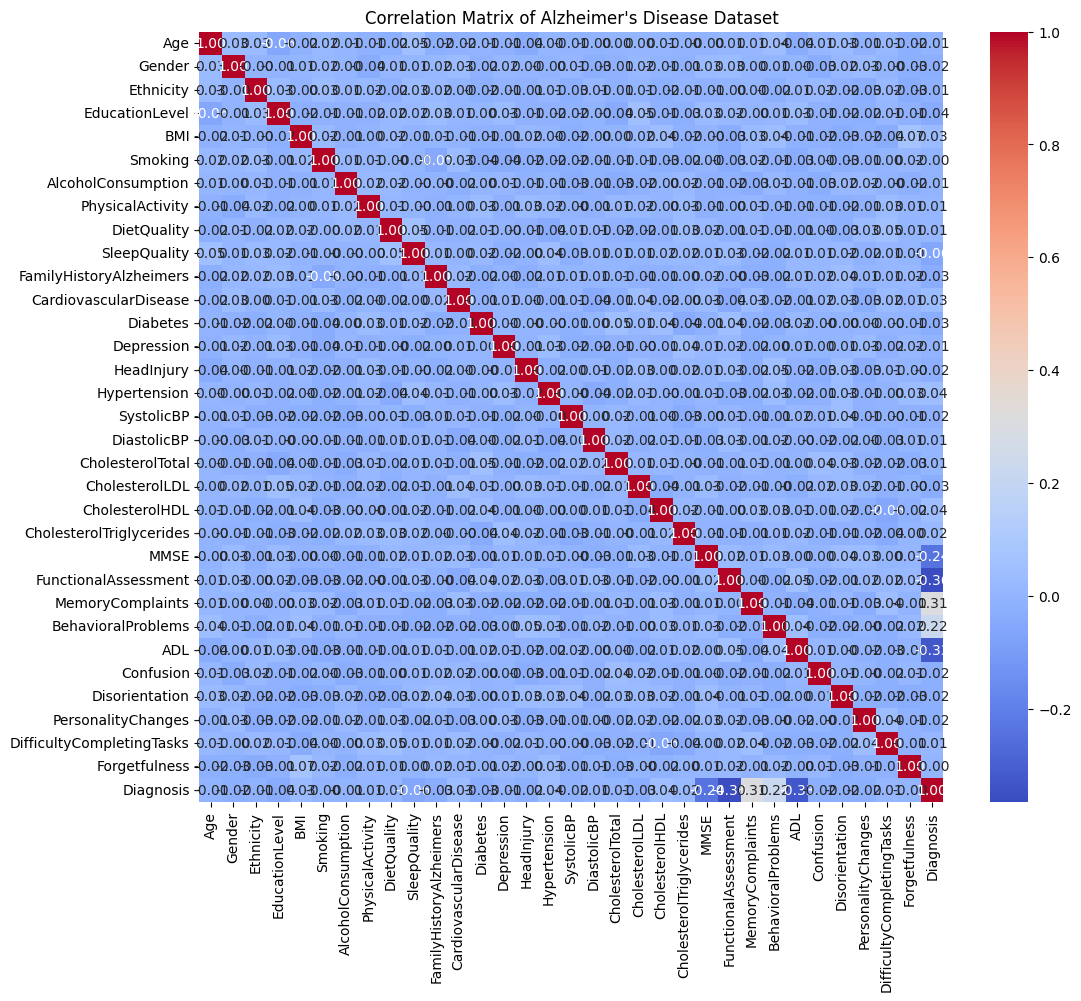

In [11]:

import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = data.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Alzheimer\'s Disease Dataset')
plt.show()


# **K-NN Classifiction**

In [12]:

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

X = data.drop('Diagnosis', axis=1)
y = data['Diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'p': [1, 2],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [10, 20, 30, 40],
}

knn = KNeighborsClassifier()

grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best Hyperparameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

best_knn = grid_search.best_estimator_
accuracy = best_knn.score(X_test, y_test)
print("Test Accuracy:", accuracy)


Best Hyperparameters: {'algorithm': 'auto', 'leaf_size': 10, 'metric': 'manhattan', 'n_neighbors': 15, 'p': 1, 'weights': 'distance'}
Best Score: 0.7643772459149772
Test Accuracy: 0.7325581395348837


# **K-means clustring**

/usr/local/lib/python3.11/dist-packages/yellowbrick/style/colors.py:35: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  mpl_ge_150 = LooseVersion(mpl.__version__) >= "1.5.0"
/usr/local/lib/python3.11/dist-packages/setuptools/_distutils/version.py:337: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
/usr/local/lib/python3.11/dist-packages/yellowbrick/style/rcmod.py:31: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  mpl_ge_150 = LooseVersion(mpl.__version__) >= "1.5.0"
/usr/local/lib/python3.11/dist-packages/setuptools/_distutils/version.py:337: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


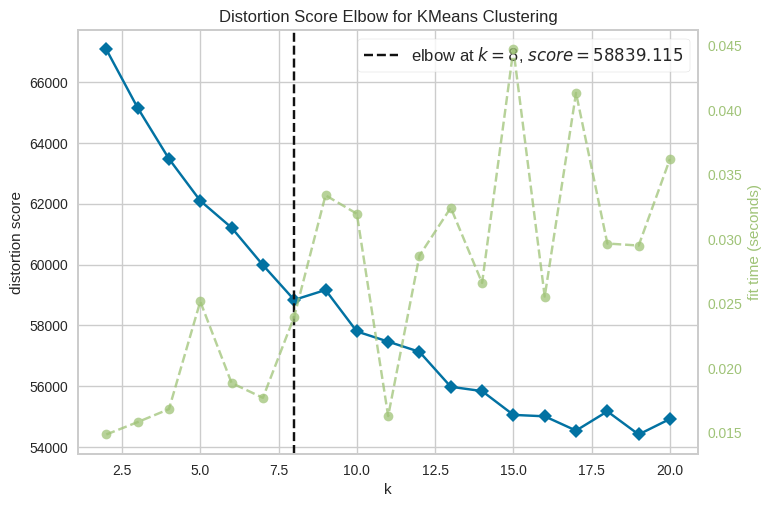

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [13]:

from yellowbrick.cluster import KElbowVisualizer


if 'Diagnosis' in data.columns:
    X = data.drop('Diagnosis', axis=1)
else:
    X = data.copy()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Elbow_M = KElbowVisualizer(KMeans(), k=20)
Elbow_M.fit(X_scaled)
Elbow_M.show()